In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [6]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [8]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [9]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [10]:
df.drop(168, axis=0, inplace=True)

In [11]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [12]:
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.set_index('Month', inplace=True)

In [14]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


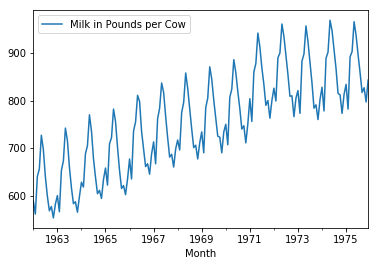

In [18]:
df.plot()

In [19]:
time_series = df['Milk in Pounds per Cow']

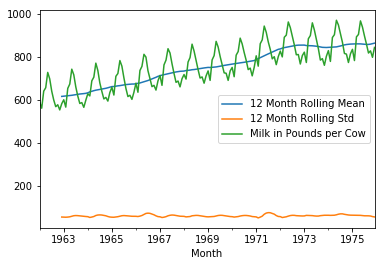

In [21]:
# reflection of yearly moving average
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
decomp = seasonal_decompose(time_series)

C:\Users\johna\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


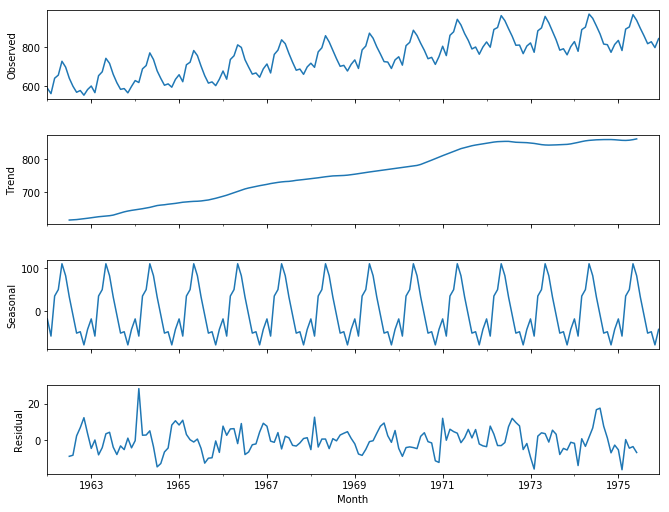

In [29]:
fig = decomp.plot()
fig.set_size_inches(10,8)

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
result = adfuller(df['Milk in Pounds per Cow'])

In [36]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', 
              '# of lags', '# of Observations used']
    
    for value, label in zip(result, labels):
        print(label + ": " + str(value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
    
    else:
        print('Weak evidence against null hypothesis')
        print('Failed to reject null hypothesis')
        print('Date has unit root, it is non-stationary')

In [37]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic: -1.30381158742
p-value: 0.627426708603
# of lags: 13
# of Observations used: 154
Weak evidence against null hypothesis
Failed to reject null hypothesis
Date has unit root, it is non-stationary


In [38]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

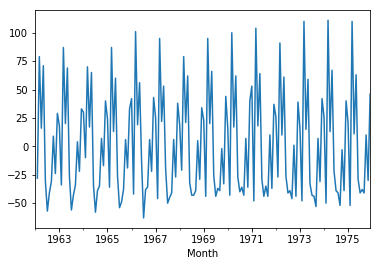

In [39]:
df['First Difference'].plot()

In [41]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -3.05499555865
p-value: 0.0300680040018
# of lags: 14
# of Observations used: 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [42]:
# if first difference was not stationary
df['Milk Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [43]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -14.3278736456
p-value: 1.11269893321e-26
# of lags: 11
# of Observations used: 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [44]:
# take seasonal difference
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

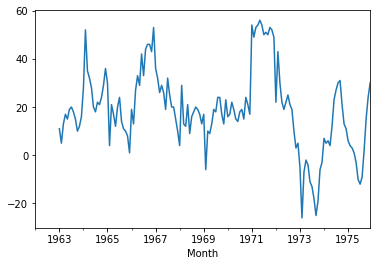

In [45]:
df['Seasonal Difference'].plot()

In [47]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -2.33541931436
p-value: 0.160798805277
# of lags: 12
# of Observations used: 143
Weak evidence against null hypothesis
Failed to reject null hypothesis
Date has unit root, it is non-stationary


In [48]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

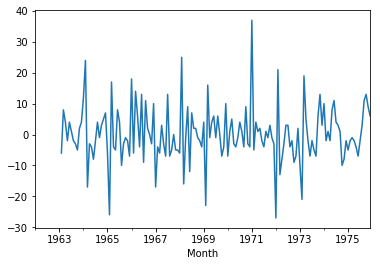

In [49]:
df['Seasonal First Difference'].plot()

In [50]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -5.03800227492
p-value: 1.86542343188e-05
# of lags: 11
# of Observations used: 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

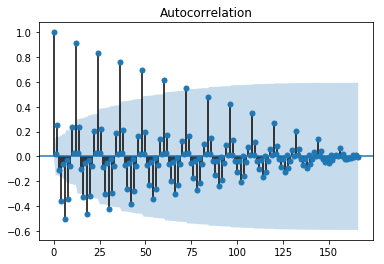

In [53]:
# gradual decline
fig_first = plot_acf(df['First Difference'].dropna())

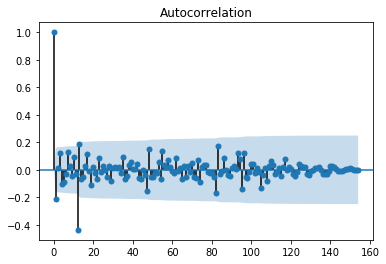

In [55]:
# Sudden drop off
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

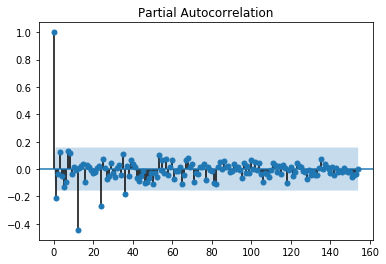

In [58]:
# partial
# sudden drop off -> will see it for almost every partial auto correlation
result = plot_pacf(df['Seasonal First Difference'].dropna())

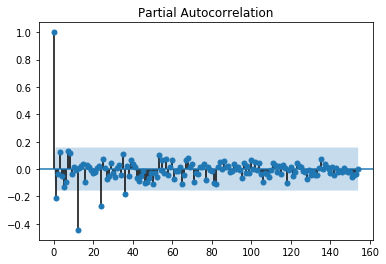

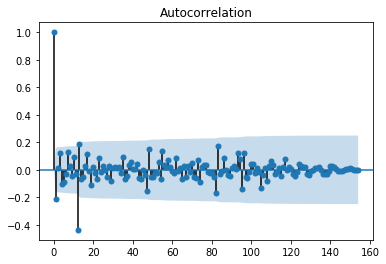

In [61]:
r = plot_pacf(df['Seasonal First Difference'].dropna())
b = plot_acf(df['Seasonal First Difference'].dropna())